# Reading and Writing Spatial Data with Python

Reading and writing spatial datata can be done in pyta?hon with different way. First we need to know what is spatial dat

### What is spatial data?

Spatial data is a data that contains a geometries dimentions(points, linestring, polygon etc...).
Spatial data contains in it's dataset a specific column recording geometries or coordinates of specific locations or places on earth.
Spatial data can stored in different formats, we have shapefiles, .shp (which contains different format in its folder), geojson etc....\
There are different python libraries that can read spatial file. I will focus more on geopandas in my study today.

As i'm still in the region of Kaolack in Senegal, i've stored earlier a shapefile of this region somewhere on my computer. Threrfore, i will use geopandas to read the shapefile.

In [1]:
import geopandas
import pandas as pd, numpy as np, matplotlib.pyplot as plt, shapely

In [4]:
source_file = 'D:\Research\PROJECT\SENEGAL DATA ANALYSIS\data\kawlack_data\kawlack_data.shp'

In [5]:
# Reading the source_file using geopandas.read_file
kaolack_shape = geopandas.read_file(source_file)

In [6]:
type(kaolack_shape)

geopandas.geodataframe.GeoDataFrame

In [8]:
# Extracting the first 10 rows of the data
kaolack_shape.head(10)

,osmid,oneway,lanes,ref,highway,maxspeed,length,from,to,junction,bridge,name,access,service,u,v,key,geometry
0,368416001,0,2,N 4,trunk,90,81.951,4450952697,249169804,None,None,None,None,None,249169804,4450952697,0,"LINESTRING (-15.66364 13.68588, -15.66419 13.6..."
1,368416001,0,2,N 4,trunk,90,85.341,4450952699,249169804,None,None,None,None,None,249169804,4450952699,0,"LINESTRING (-15.66476 13.68692, -15.66419 13.6..."
2,448838278,0,None,None,residential,None,112.583,4458135539,249169804,None,None,None,None,None,249169804,4458135539,0,"LINESTRING (-15.66488 13.68563, -15.66419 13.6..."
3,368416001,0,2,N 4,trunk,90,89.058,4574889239,249169807,None,None,None,None,None,249169807,4574889239,0,"LINESTRING (-15.61583 13.63915, -15.61520 13.6..."
4,461917275,0,None,None,track,None,23.336,4573518238,249169807,None,None,None,None,None,249169807,4573518238,0,"LINESTRING (-15.61511 13.63883, -15.61520 13.6..."
5,368416001,0,2,N 4,trunk,90,399.723,2142497620,249169807,None,None,None,None,None,249169807,2142497620,0,"LINESTRING (-15.61267 13.63605, -15.61299 13.6..."
6,368416001,0,2,N 4,trunk,90,11.329,6375081803,249169808,None,None,None,None,None,249169808,6375081803,0,"LINESTRING (-15.60817 13.61843, -15.60820 13.6..."
7,689618192,0,None,None,unclassified,None,20.975,6375081802,249169808,None,None,None,None,None,249169808,6375081802,0,"LINESTRING (-15.60839 13.61858, -15.60820 13.6..."
8,368416001,0,2,N 4,trunk,90,654.697,4450940948,249169808,None,None,None,None,None,249169808,4450940948,0,"LINESTRING (-15.60946 13.62429, -15.60870 13.6..."
9,169821222,0,None,None,unclassified,None,36.885,4578934653,1809793243,None,None,None,None,None,1809793243,4578934653,0,"LINESTRING (-15.48303 13.58614, -15.48327 13.5..."


In [9]:
# checking the columns
kaolack_shape.columns

Index(['osmid', 'oneway', 'lanes', 'ref', 'highway', 'maxspeed', 'length',
       'from', 'to', 'junction', 'bridge', 'name', 'access', 'service', 'u',
       'v', 'key', 'geometry'],
      dtype='object')

In [10]:
# We can see 'geometry' within the name of columns, let's extract some of it
kaolack_shape['geometry'].head()

0    LINESTRING (-15.66364 13.68588, -15.66419 13.6...
1    LINESTRING (-15.66476 13.68692, -15.66419 13.6...
2    LINESTRING (-15.66488 13.68563, -15.66419 13.6...
3    LINESTRING (-15.61583 13.63915, -15.61520 13.6...
4    LINESTRING (-15.61511 13.63883, -15.61520 13.6...
Name: geometry, dtype: geometry

We have LINESTRING here in the geometries (we sow it in the first study geometries, first step to Geospatial in Python).

### Processing a little bit of our data 

In [11]:
# Let's count the missing values in our data 
kaolack_shape.isnull().sum()

osmid           0
oneway          0
lanes       26248
ref         26679
highway         0
maxspeed    26825
length          0
from            0
to              0
junction    27417
bridge      27448
name        27261
access      27278
service     27412
u               0
v               0
key             0
geometry        0
dtype: int64

There is no missing values in 'geometry' column, which make our data little bit good, because we are more interested in spatial affair here.

<AxesSubplot:>

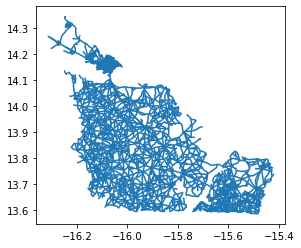

In [12]:
# Plotting our data
kaolack_shape.plot()

There, we have the shape of kaolack.

In [13]:
from osgeo import ogr

In [14]:
shape_kaolck = ogr.Open(source_file)


In [16]:
import osgeo.ogr
shapefile = osgeo.ogr.Open(source_file)

In [17]:
shapefile

<osgeo.ogr.DataSource; proxy of <Swig Object of type 'OGRDataSourceShadow *' at 0x00000000195866F0> >

In [21]:
numLayers = shapefile.GetLayerCount()
print("Shapefile contains {} layers".format(numLayers))

Shapefile contains 1 layers


In [22]:
for layerNum in range(numLayers):
    layer = shapefile.GetLayer(layerNum)
    spatialRef = layer.GetSpatialRef().ExportToProj4()
    numFeatures = layer.GetFeatureCount()
    print("Layer {} has spatial reference {}".format(layerNum, spatialRef))
    print("Layer {} has {} features".format(layerNum, numFeatures))

Layer 0 has spatial reference +proj=longlat +datum=WGS84 +no_defs
Layer 0 has 27473 features


## Writing a shapefile

The shapefile extracted above has be written and saved into disk, that why we could read it with specific libraries in python.
Let's try to extract some spatial data and save it to shapefile.

We easily could save our kaolack_shape data to a specific folder with geopandas using function 'to_file', that make a sense of writing a spatial data. We need to do more,

In [26]:
data = geopandas.read_file('D:\Research\PROJECT\SENEGAL DATA ANALYSIS\data\spatial_data\hotel_thies_dakar\hotel_thies_dakar.shp')


In [27]:
data.head()

,hotel_name,addresses,phone_numb,coordinate,x,y,geometry
0,"Radisson Blu Hotel, Dakar Sea Plaza","Route de la Corniche O, Dakar 16868, Senegal",+221 33 869 33 33,"-17.4730893,14.6945826",-17.473089,14.694583,POINT (-17.47309 14.69458)
1,Radisson Hotel Dakar Diamniadio,Prolongement Autoroute a peage a cote du centr...,+221 32 824 48 48,"-17.1970069,14.7385608",-17.197007,14.738561,POINT (-17.19701 14.73856)
2,Paradialaw,"Senegal, Toubab Dialao, toubab dialaw , prés d...",None,"-17.14559,14.5963946",-17.145590,14.596395,POINT (-17.14559 14.59639)
3,Hotel Club Royal Saly,"Route Saly-Ngaparou M'bour SN, 23002, Senegal",+221 33 939 52 30,"-17.0221955,14.4432474",-17.022195,14.443247,POINT (-17.02220 14.44325)
4,Le Grand Hôtel de Thiés,"Thies, Senegal",+221 33 951 00 98,"-16.9280314,14.7950366",-16.928031,14.795037,POINT (-16.92803 14.79504)


<AxesSubplot:>

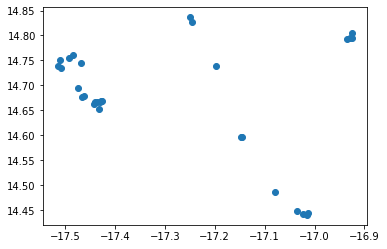

In [28]:
data.plot()

In [29]:
type(data)

geopandas.geodataframe.GeoDataFrame

The following codes are a repeat of similar code using osgeo.ogr from GDAL to read shapefile with different spatial data. 

In [33]:
hotels_shapes = osgeo.ogr.Open('D:\Research\PROJECT\SENEGAL DATA ANALYSIS\data\spatial_data\hotel_thies_dakar\hotel_thies_dakar.shp')

In [34]:
hotels_shapes

<osgeo.ogr.DataSource; proxy of <Swig Object of type 'OGRDataSourceShadow *' at 0x00000000195ACF30> >

In [39]:
hotels_layers = hotels_shapes.GetLayerCount()
print("Shapefile contains {} layers".format(hotels_layers))

Shapefile contains 1 layers


In [40]:
for layerNum in range(hotels_layers):
    layer = shapefile.GetLayer(layerNum)
    spatialRef = layer.GetSpatialRef().ExportToProj4()
    numFeatures = layer.GetFeatureCount()
    print("Layer {} has spatial reference {}".format(layerNum, spatialRef))
    print("Layer {} has {} features".format(layerNum, numFeatures))

Layer 0 has spatial reference +proj=longlat +datum=WGS84 +no_defs
Layer 0 has 27473 features


## 'geometry' column make spatial data different from dataframe

Let's explore a little bit on geometries. Geometry column in spatial data make sptail data special

In [44]:
# Extract kaolack shapefile geometries
kaolack_shape.geometry.head()

0    LINESTRING (-15.66364 13.68588, -15.66419 13.6...
1    LINESTRING (-15.66476 13.68692, -15.66419 13.6...
2    LINESTRING (-15.66488 13.68563, -15.66419 13.6...
3    LINESTRING (-15.61583 13.63915, -15.61520 13.6...
4    LINESTRING (-15.61511 13.63883, -15.61520 13.6...
Name: geometry, dtype: geometry

In [43]:
# Extract hotels shapefile geometries
data['geometry'].head()

0    POINT (-17.47309 14.69458)
1    POINT (-17.19701 14.73856)
2    POINT (-17.14559 14.59639)
3    POINT (-17.02220 14.44325)
4    POINT (-16.92803 14.79504)
Name: geometry, dtype: geometry

The kaolack shape data are linestring and the hotels data (data) are points.

AxesSubplot(0.224444,0.125;0.576112x0.755)
AxesSubplot(0.137233,0.125;0.750533x0.755)


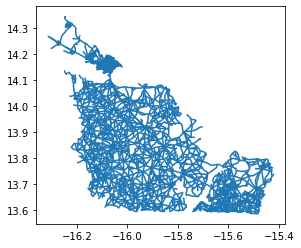

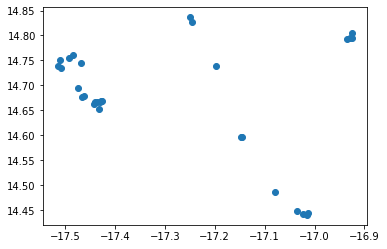

In [45]:
print(kaolack_shape.plot());
print(data.plot())

In [61]:
len(kaolack_shape)

27473

In [63]:
kaolack_shape.shape

(27473, 18)

<AxesSubplot:>

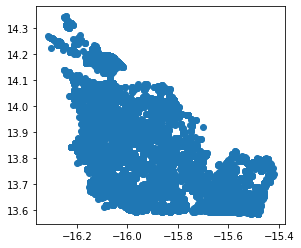

In [70]:
kaolack_shape.boundary.plot()

In [72]:
kaolack_shape.boundary.head()

0    MULTIPOINT (-15.66364 13.68588, -15.66419 13.6...
1    MULTIPOINT (-15.66476 13.68692, -15.66419 13.6...
2    MULTIPOINT (-15.66488 13.68563, -15.66419 13.6...
3    MULTIPOINT (-15.61583 13.63915, -15.61520 13.6...
4    MULTIPOINT (-15.61511 13.63883, -15.61520 13.6...
dtype: geometry

In [73]:
for index, row in kaolack_shape[:10].iterrows():
    poly_area = row['geometry'].area
    print("Polygon area at index {0} is: {1:.3f}".format(index, poly_area))

Polygon area at index 0 is: 0.000
Polygon area at index 1 is: 0.000
Polygon area at index 2 is: 0.000
Polygon area at index 3 is: 0.000
Polygon area at index 4 is: 0.000
Polygon area at index 5 is: 0.000
Polygon area at index 6 is: 0.000
Polygon area at index 7 is: 0.000
Polygon area at index 8 is: 0.000
Polygon area at index 9 is: 0.000


### Writing a shapefile with osmnx library

In [1]:
import osmnx as ox

In [2]:
kaolack_graph_shape = ox.graph_from_place('Kaolack')

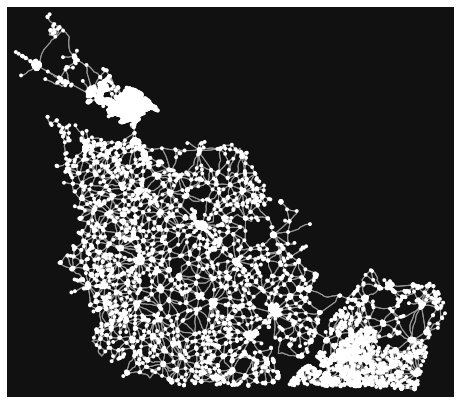

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [3]:
ox.plot_graph(kaolack_graph_shape)

In [6]:
# Saving the kaolack_graph_shape to the output folder 
ox.save_graph_shapefile(kaolack_graph_shape, 'D:\Research\PROJECT\SENEGAL DATA ANALYSIS\output\kaolack_shapefile')


Conclusion:\
    We sow in our study reading and writing shapefile, from loading the saved shapefile and writing a new shapefile with different librarires in python. 
    We keep note that a shapefile is a folder which contains sometimes three to more files with different types but all are related to each other. The most type inside the shapefile are .shp, .prj, .cpg.